In [1]:
from models import DBScan
import pandas as pd
from models.model_selection import PlotType, plot
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from itertools import product
from models.metrics import silhouette_score
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")

# Load data

In [2]:
data = pd.read_csv('../data/Dataset1.csv')
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2
882,264,10.3,475,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0
883,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0


In [3]:
target_column = 'Fertility'
normalization_type = 'minmax'

In [4]:
from models import preprocessing

X, Y = preprocessing.treat_data(data, target_column=target_column, normalization=normalization_type)
X

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM
0,0.264264,0.435115,0.552288,0.479167,0.560000,0.512821,0.422151,0.250000,0.009671,0.338308,0.462366,0.056818,0.512821
1,0.489489,0.351145,0.189542,0.645833,0.733333,0.820513,0.553960,0.338235,0.062863,0.721393,0.149462,0.601719,0.820513
2,0.339339,0.511450,0.810458,0.614583,0.413333,0.863248,0.493747,0.338235,0.062863,0.736318,0.139247,0.601719,0.863248
3,0.321321,0.297710,0.413399,0.666667,0.506667,0.717949,0.553960,0.397059,0.031915,0.716418,0.136559,0.601719,0.717949
4,0.660661,0.534351,0.362745,0.656250,0.266667,0.649573,0.895666,0.264706,0.053191,0.796020,0.124731,0.601719,0.649573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0.903904,0.595420,0.655229,1.000000,0.413333,0.162393,0.529695,0.426471,0.433269,0.298507,0.587097,0.715909,0.162393
879,0.642643,0.465649,0.431373,0.250000,0.360000,0.000000,0.263242,0.411765,0.778530,0.179104,0.423118,0.386364,0.000000
880,0.678679,0.480916,0.241830,0.645833,0.560000,0.333333,0.481541,0.514706,0.324952,0.268657,0.342473,0.295455,0.333333
881,0.810811,0.832061,0.276144,0.395833,0.600000,0.829060,0.384430,0.750000,0.422631,0.462687,0.706452,0.534091,0.829060


In [5]:
# save the data
pd.concat([X, Y], axis=1).to_csv(f'../data/Dataset1_preprocessed_{normalization_type}.csv', index=False)

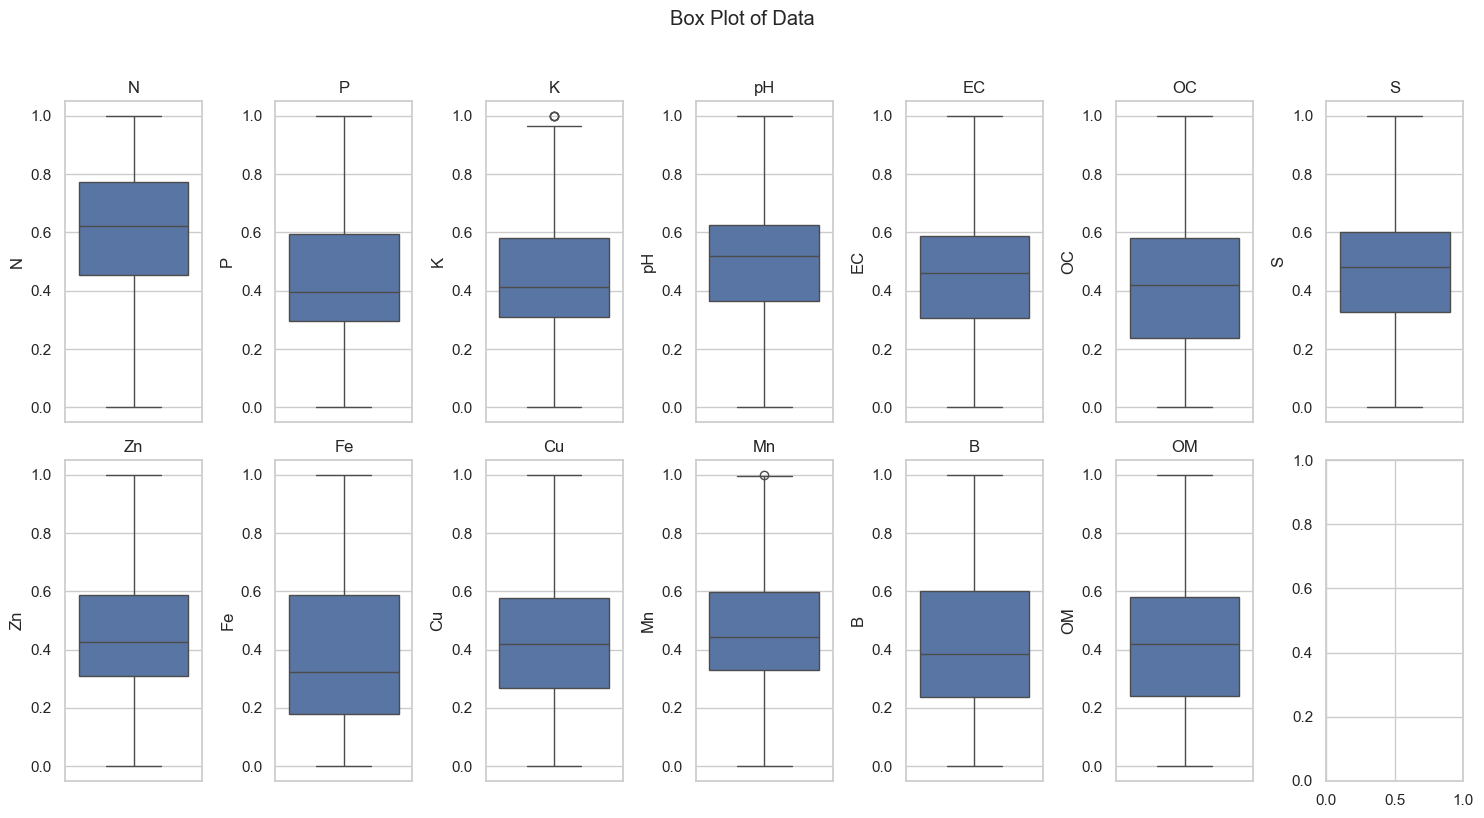

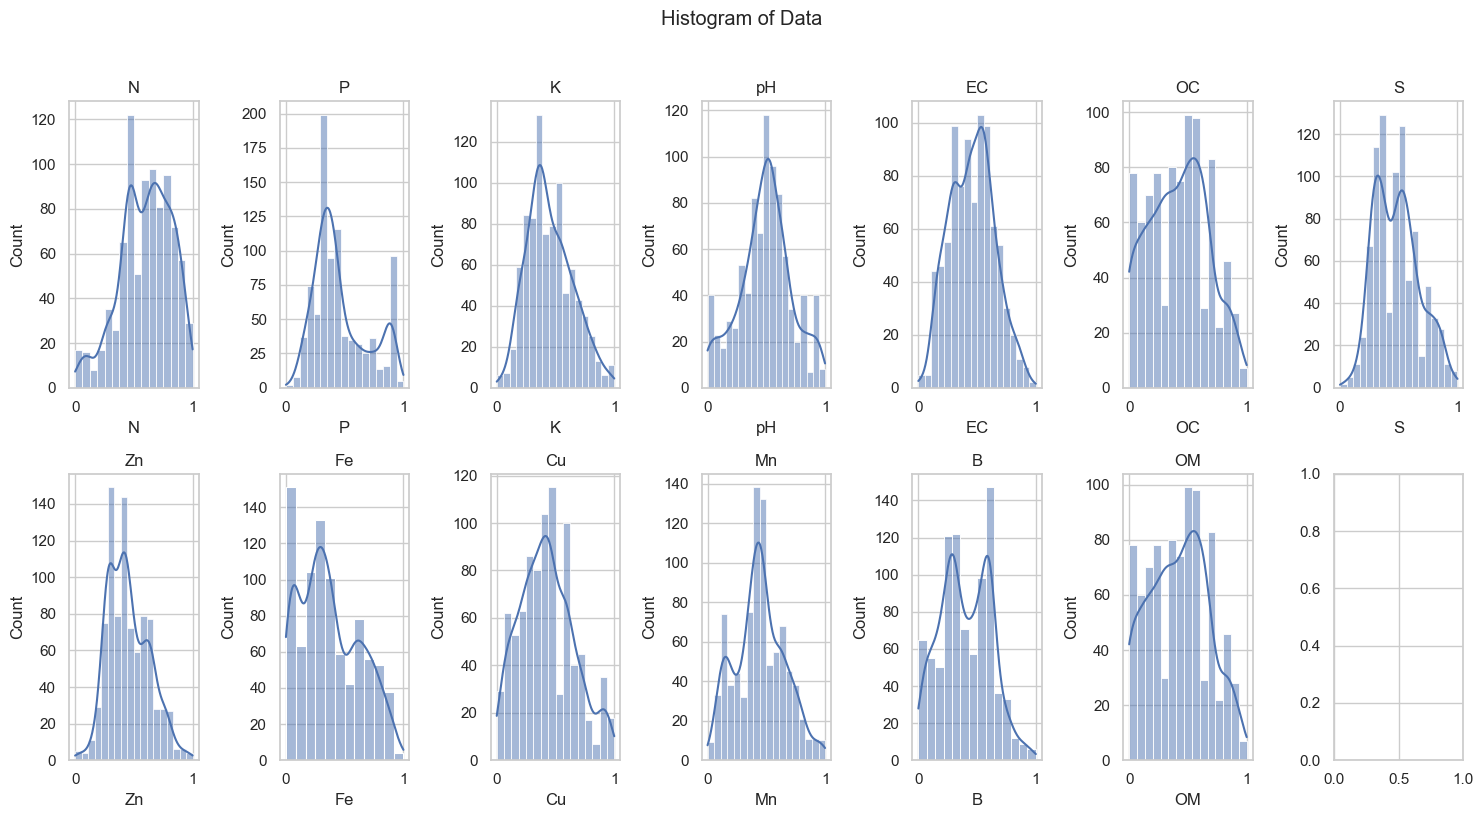

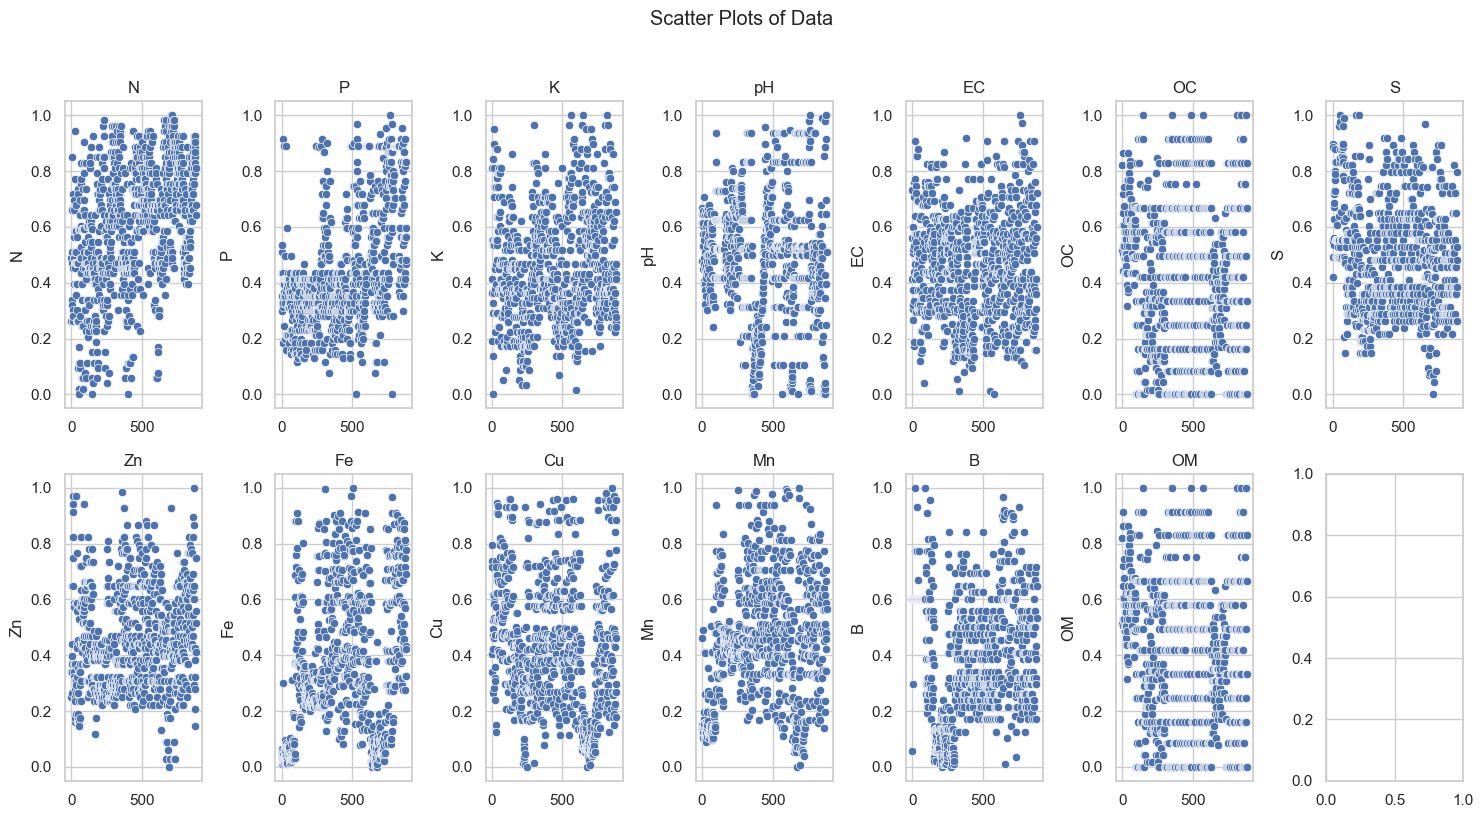

In [6]:
for current_type in PlotType:
    plot(X, plot_type=current_type)

In [23]:
dbscan = DBScan(eps=0.3, min_samples=4, strategy='euclidean')

In [24]:
dbscan.fit(X)

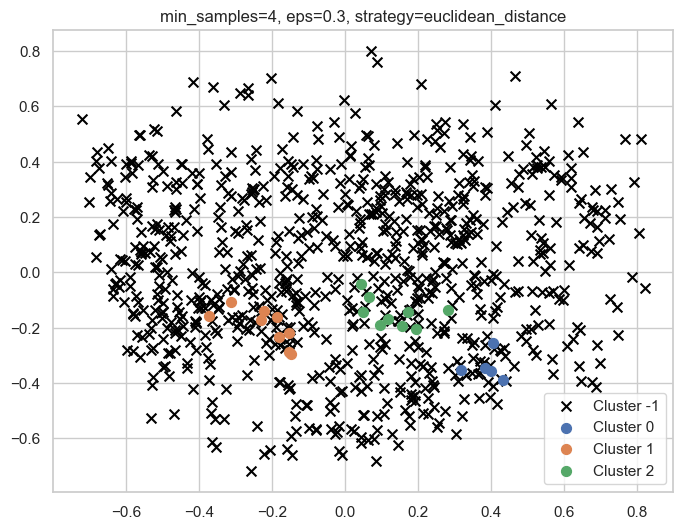

In [25]:
dbscan.plot()

In [30]:
params = {
    'eps': [0.2, 0.3, 0.4, 0.5],
    'min_samples': [2, 4, 7],
    'strategy': ['euclidean', 'cosine']
}

In [31]:
param_combos = list(product(*params.values()))

In [32]:
models = [DBScan(eps=eps, min_samples=min_samples, strategy=strategy) for eps, min_samples, strategy in param_combos]
models

[DBScan(min_samples=2, eps=0.2, strategy=euclidean_distance),
 DBScan(min_samples=2, eps=0.2, strategy=cosine_distance),
 DBScan(min_samples=4, eps=0.2, strategy=euclidean_distance),
 DBScan(min_samples=4, eps=0.2, strategy=cosine_distance),
 DBScan(min_samples=7, eps=0.2, strategy=euclidean_distance),
 DBScan(min_samples=7, eps=0.2, strategy=cosine_distance),
 DBScan(min_samples=2, eps=0.3, strategy=euclidean_distance),
 DBScan(min_samples=2, eps=0.3, strategy=cosine_distance),
 DBScan(min_samples=4, eps=0.3, strategy=euclidean_distance),
 DBScan(min_samples=4, eps=0.3, strategy=cosine_distance),
 DBScan(min_samples=7, eps=0.3, strategy=euclidean_distance),
 DBScan(min_samples=7, eps=0.3, strategy=cosine_distance),
 DBScan(min_samples=2, eps=0.4, strategy=euclidean_distance),
 DBScan(min_samples=2, eps=0.4, strategy=cosine_distance),
 DBScan(min_samples=4, eps=0.4, strategy=euclidean_distance),
 DBScan(min_samples=4, eps=0.4, strategy=cosine_distance),
 DBScan(min_samples=7, eps=0.4, 

In [34]:
silhouette_scores = []
for model in models:
    model.fit(X)
    if len(set(model.labels_)) == 1:
        continue
    results = {"model": str(model), "silhouette_score": silhouette_score(X.to_numpy(), model.labels_, strategy=model.strategy.__name__.split('_')[0])}
    silhouette_scores.append(results)

pd.DataFrame(silhouette_scores).sort_values(by="silhouette_score", ascending=False)


,model,silhouette_score
6,"DBScan(min_samples=4, eps=0.5, strategy=euclid...",0.053008
7,"DBScan(min_samples=7, eps=0.5, strategy=euclid...",0.053008
4,"DBScan(min_samples=7, eps=0.4, strategy=euclid...",-0.060166
3,"DBScan(min_samples=4, eps=0.4, strategy=euclid...",-0.121962
5,"DBScan(min_samples=2, eps=0.5, strategy=euclid...",-0.198663
1,"DBScan(min_samples=4, eps=0.3, strategy=euclid...",-0.219109
2,"DBScan(min_samples=2, eps=0.4, strategy=euclid...",-0.221717
0,"DBScan(min_samples=2, eps=0.3, strategy=euclid...",-0.275473


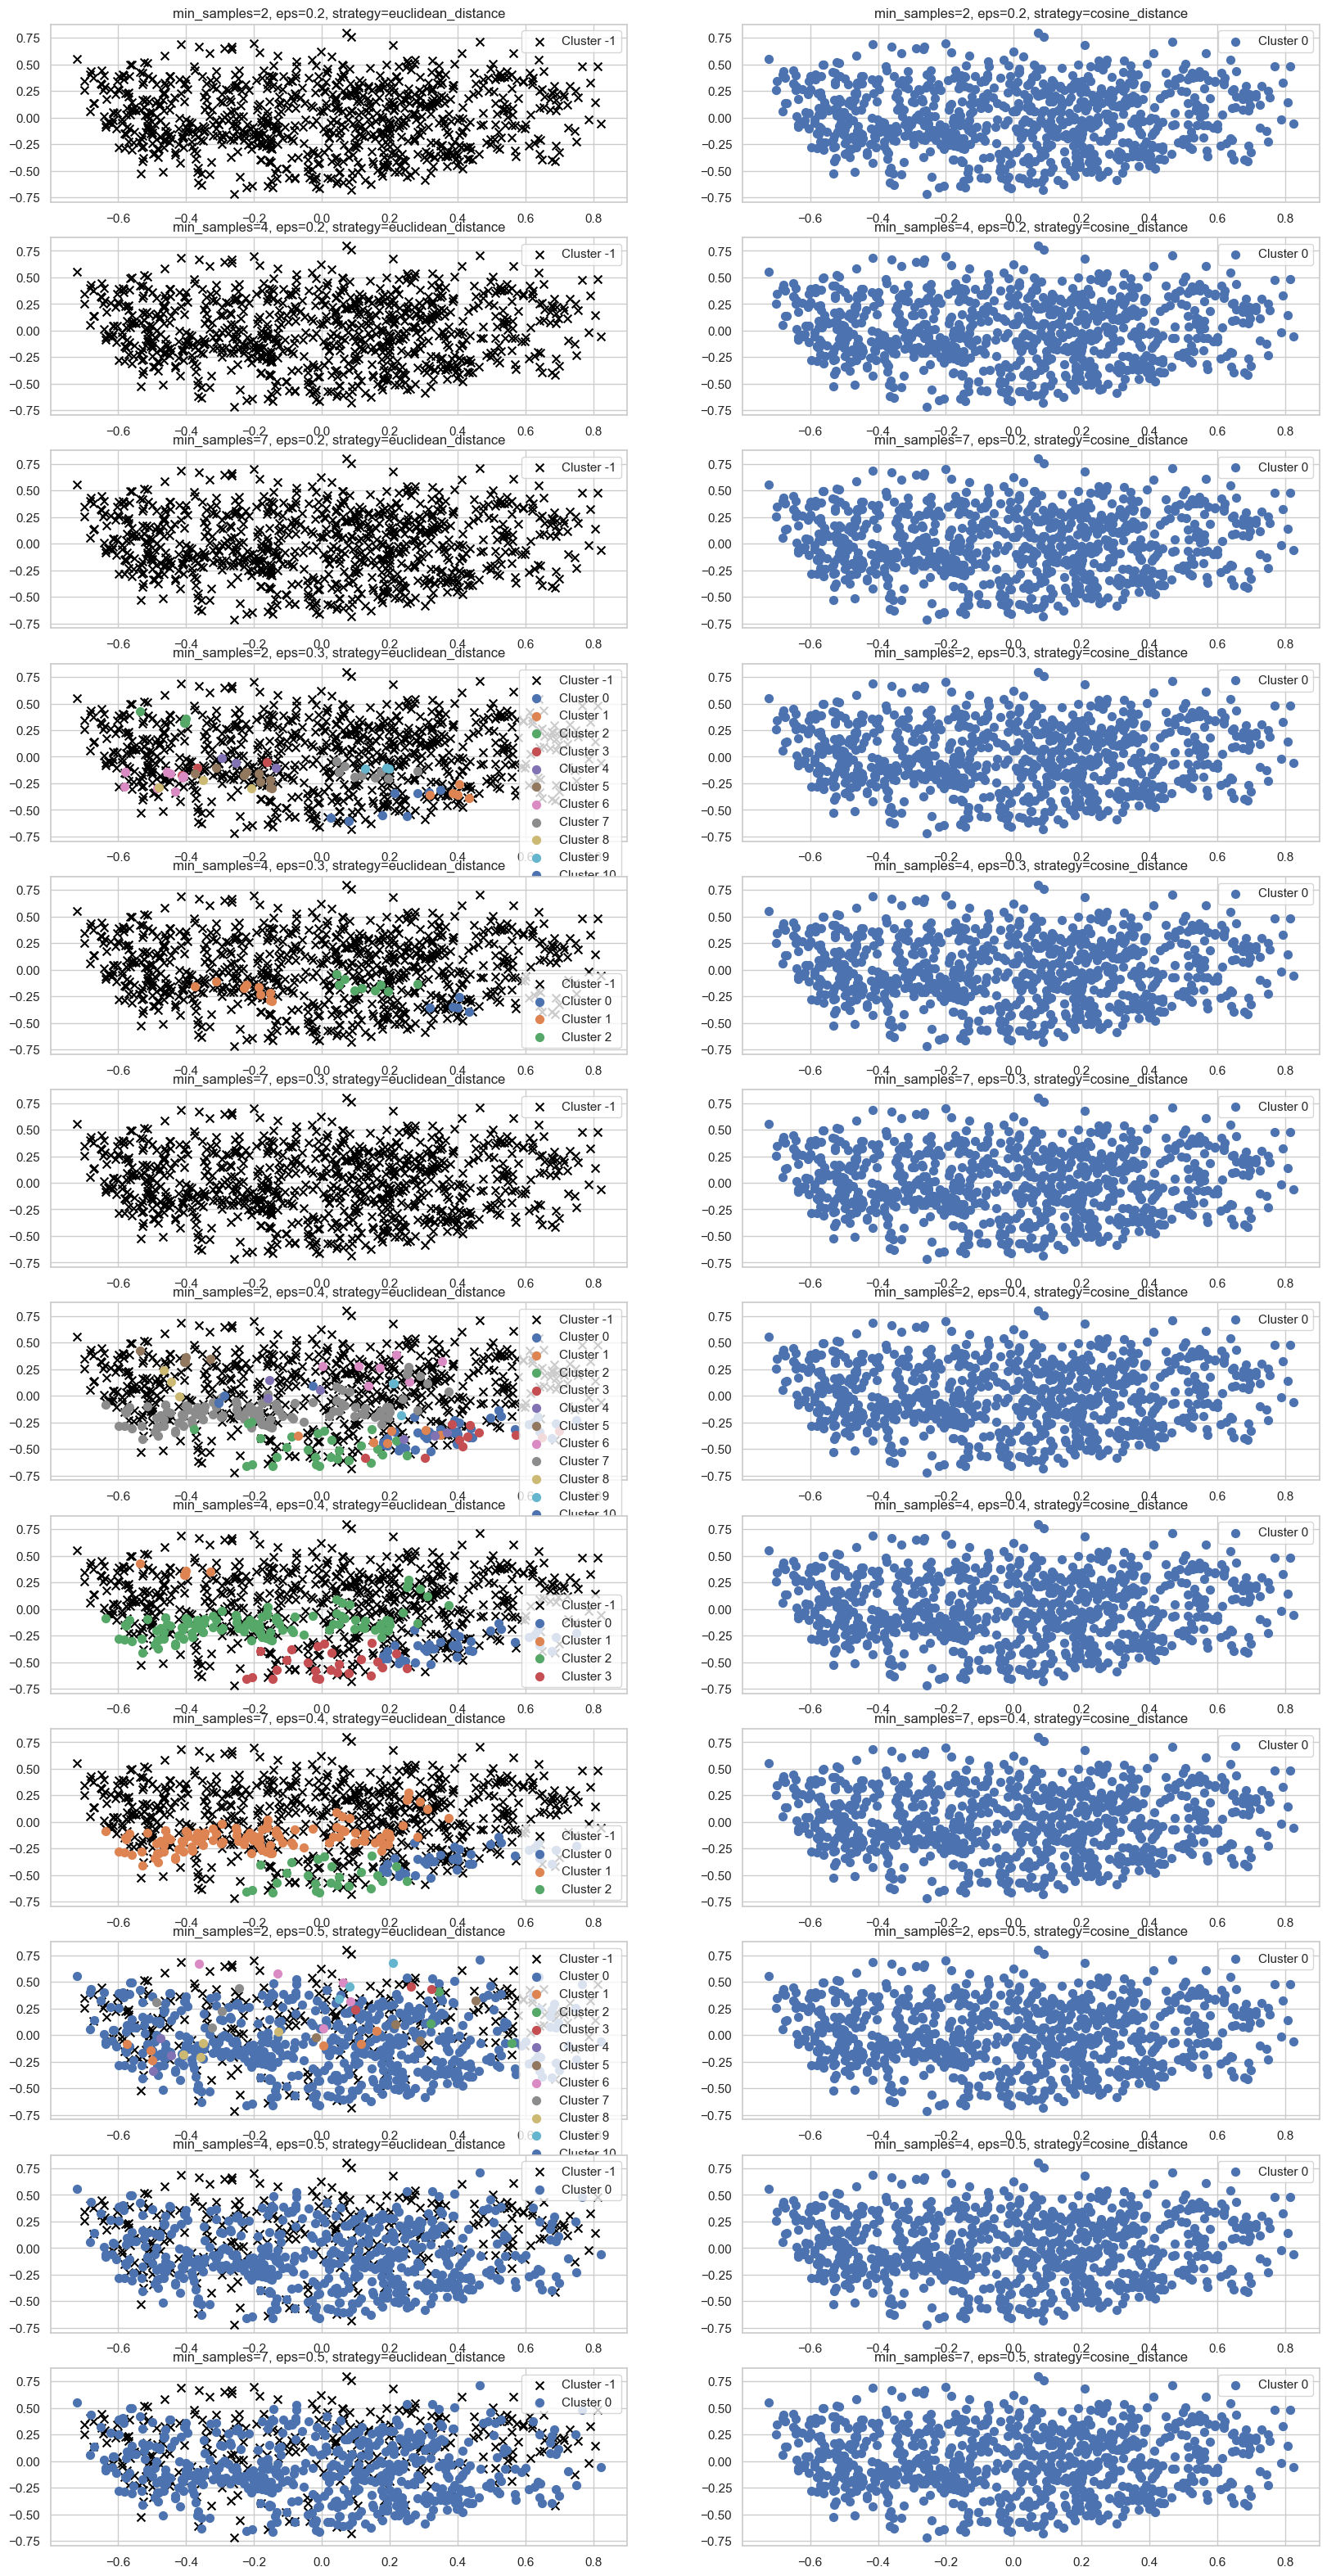

In [35]:
num_rows = (len(models) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 40))
for i, model in enumerate(models):
    row_idx = i // 2
    col_idx = i % 2
    model.plot(ax=axes[row_idx, col_idx])